# NoteBook Portafolio de Inversion

### Lectura de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.optimize import minimize


In [2]:
import yfinance as yf
import pandas as pd

# Lista de símbolos de acciones
symbols = ['AAPL', 'AMZN', 'BAC', 'C', 'F', 'GE', 'JNJ', 'JPM', 'NU', 'PFE', 'UBER', ]

# Crear un diccionario para almacenar los datos de cierre de cada acción
historical_data = {}

# Obtener los datos históricos de cierre para cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    historical_data[symbol] = ticker.history(period='1y')['Close']

# Crear un DataFrame a partir del diccionario
df_inicial = pd.DataFrame(historical_data)

df_inicial.tail(5)




,AAPL,AMZN,BAC,C,F,GE,JNJ,JPM,NU,PFE,UBER
Date,,,,,,,,,,,
2024-03-12 00:00:00-04:00,173.229996,175.389999,35.959999,57.450001,12.110,167.460007,162.740005,189.839996,11.410,28.010000,78.320000
2024-03-13 00:00:00-04:00,171.130005,176.559998,36.080002,57.759998,12.370,170.160004,161.100006,191.380005,11.590,28.219999,78.250000
2024-03-14 00:00:00-04:00,173.000000,178.750000,35.689999,57.090000,12.080,166.750000,159.210007,187.970001,11.620,28.129999,77.650002
2024-03-15 00:00:00-04:00,172.619995,174.419998,35.410000,57.610001,12.060,168.889999,158.179993,190.300003,11.610,27.940001,76.070000
2024-03-18 00:00:00-04:00,175.449905,174.860001,35.985001,58.334999,12.165,170.259995,157.050003,191.830002,11.725,27.678101,75.529800


In [3]:
#Si se desea excluir alguna accion por conocimiento Mercado

df_inicial = df_inicial.drop('BAC', axis=1)
df_inicial = df_inicial.drop('NU', axis=1)

In [4]:
print(df_inicial.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-20 00:00:00-04:00 to 2024-03-18 00:00:00-04:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   AMZN    251 non-null    float64
 2   C       251 non-null    float64
 3   F       251 non-null    float64
 4   GE      251 non-null    float64
 5   JNJ     251 non-null    float64
 6   JPM     251 non-null    float64
 7   PFE     251 non-null    float64
 8   UBER    251 non-null    float64
dtypes: float64(9)
memory usage: 19.6 KB
None


<Figure size 1000x600 with 0 Axes>

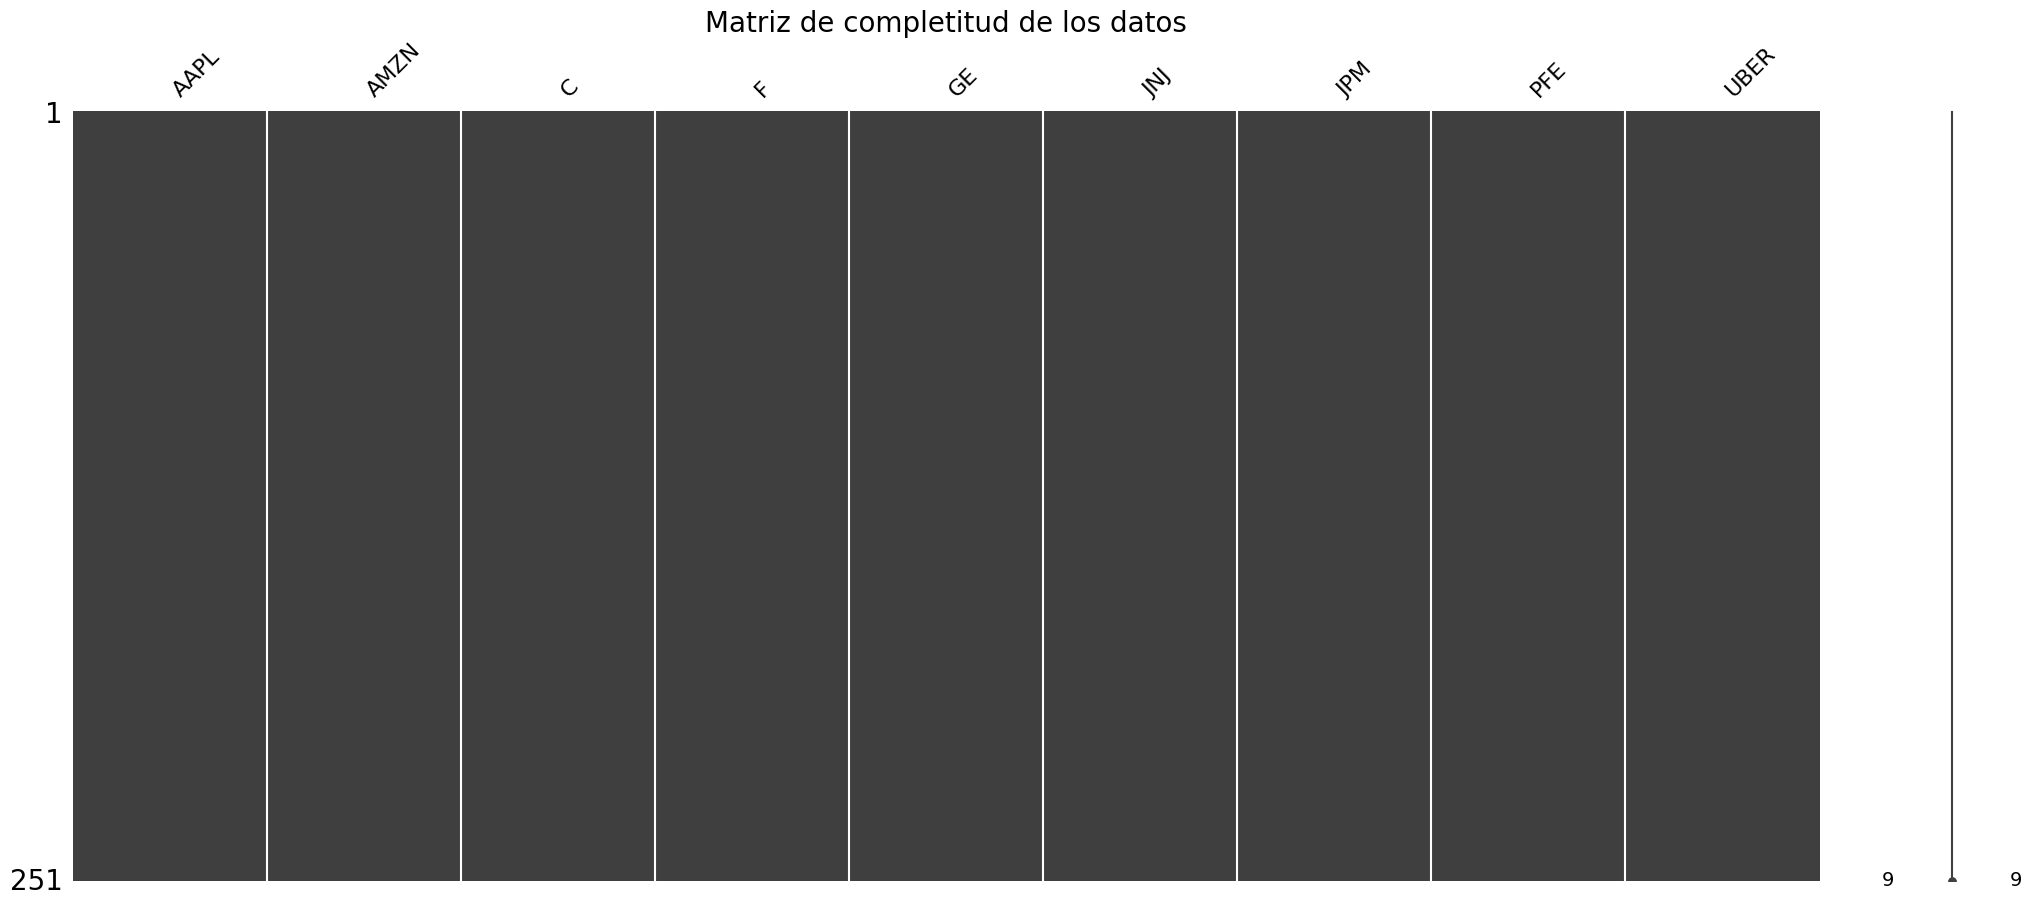

c:\Users\yjimenez\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Figure size 1000x600 with 0 Axes>

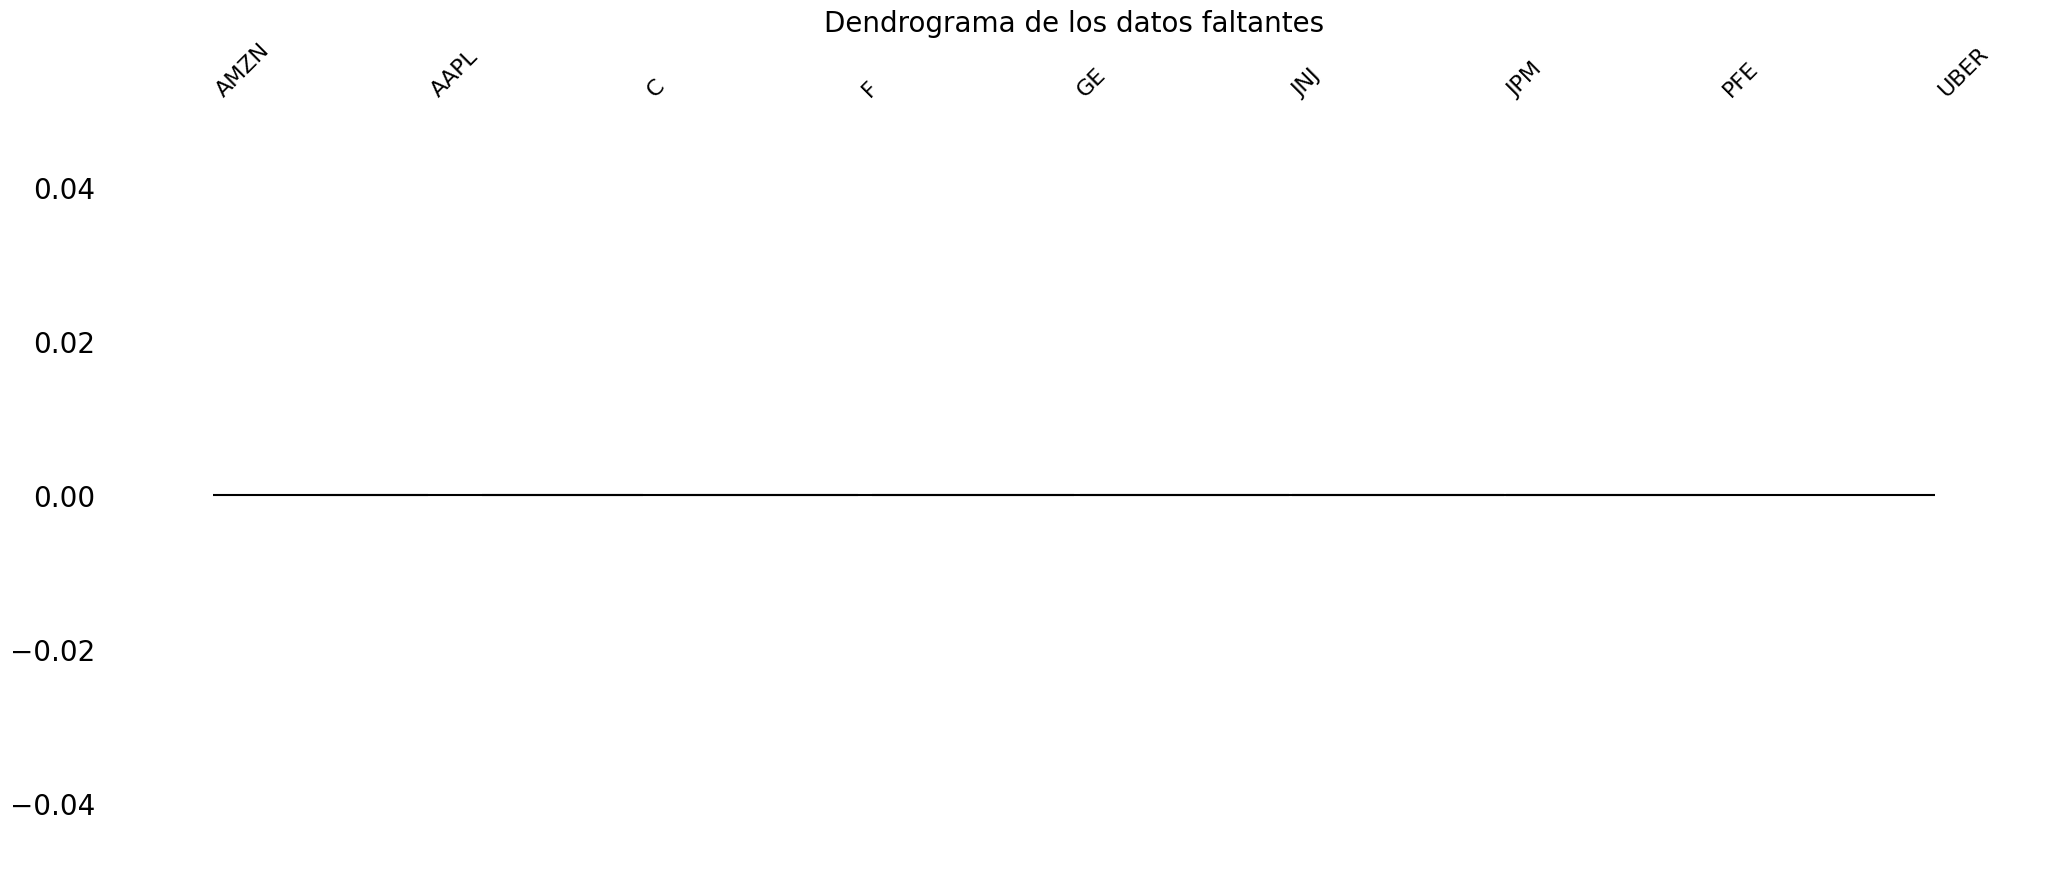

AAPL    0
AMZN    0
C       0
F       0
GE      0
JNJ     0
JPM     0
PFE     0
UBER    0
dtype: int64


In [5]:
# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(df_inicial)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(df_inicial)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(df_inicial.isnull().sum())


Calcular la matriz de correlación

In [6]:
correlacion = df_inicial.corr()
correlacion

,AAPL,AMZN,C,F,GE,JNJ,JPM,PFE,UBER
AAPL,1.000000,0.568425,0.295242,0.236583,0.362909,0.167653,0.488649,-0.498043,0.508305
AMZN,0.568425,1.000000,0.674034,0.059879,0.936339,0.156653,0.934561,-0.871313,0.964063
C,0.295242,0.674034,1.000000,0.216203,0.781672,0.248814,0.824059,-0.528541,0.775351
F,0.236583,0.059879,0.216203,1.000000,0.093337,0.509149,0.118761,0.242801,0.037363
GE,0.362909,0.936339,0.781672,0.093337,1.000000,0.201483,0.960773,-0.801299,0.961907
JNJ,0.167653,0.156653,0.248814,0.509149,0.201483,1.000000,0.282098,0.151457,0.124235
JPM,0.488649,0.934561,0.824059,0.118761,0.960773,0.282098,1.000000,-0.821688,0.959833
PFE,-0.498043,-0.871313,-0.528541,0.242801,-0.801299,0.151457,-0.821688,1.000000,-0.879786
UBER,0.508305,0.964063,0.775351,0.037363,0.961907,0.124235,0.959833,-0.879786,1.000000


Grafico de Correlacion

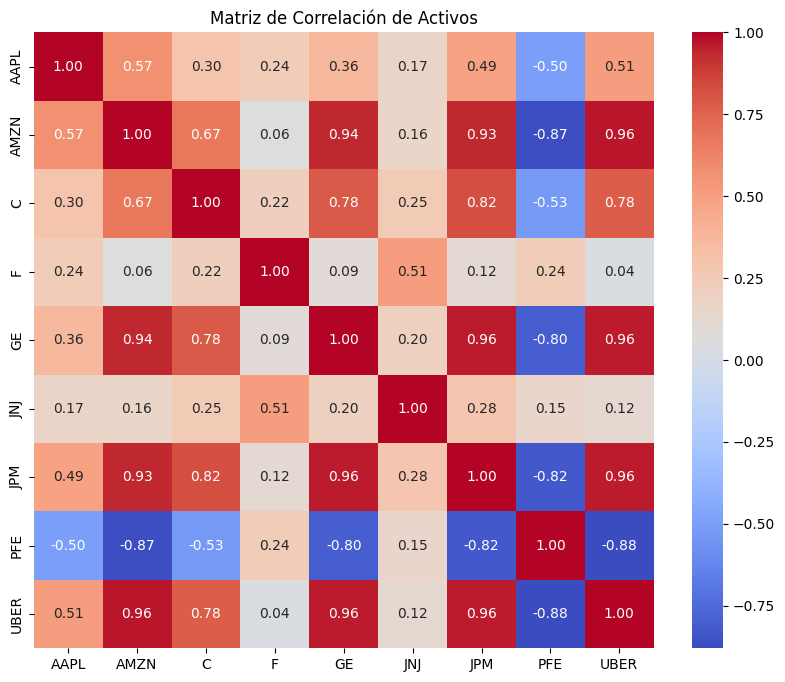

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos')
plt.show()


                                 AAPL          C         JNJ         JPM  \
Date                                                                       
2023-03-20 00:00:00-04:00  156.564301  42.156742  149.298386  123.609589   
2023-03-21 00:00:00-04:00  158.434311  43.093773  149.298386  126.924911   
2023-03-22 00:00:00-04:00  156.992020  41.793400  146.543137  123.648476   
2023-03-23 00:00:00-04:00  158.086166  41.544804  146.620743  123.317917   
2023-03-24 00:00:00-04:00  159.399185  41.219711  148.095398  121.441521   

                                 PFE  
Date                                  
2023-03-20 00:00:00-04:00  38.813042  
2023-03-21 00:00:00-04:00  38.670376  
2023-03-22 00:00:00-04:00  38.052185  
2023-03-23 00:00:00-04:00  38.213867  
2023-03-24 00:00:00-04:00  38.413589  


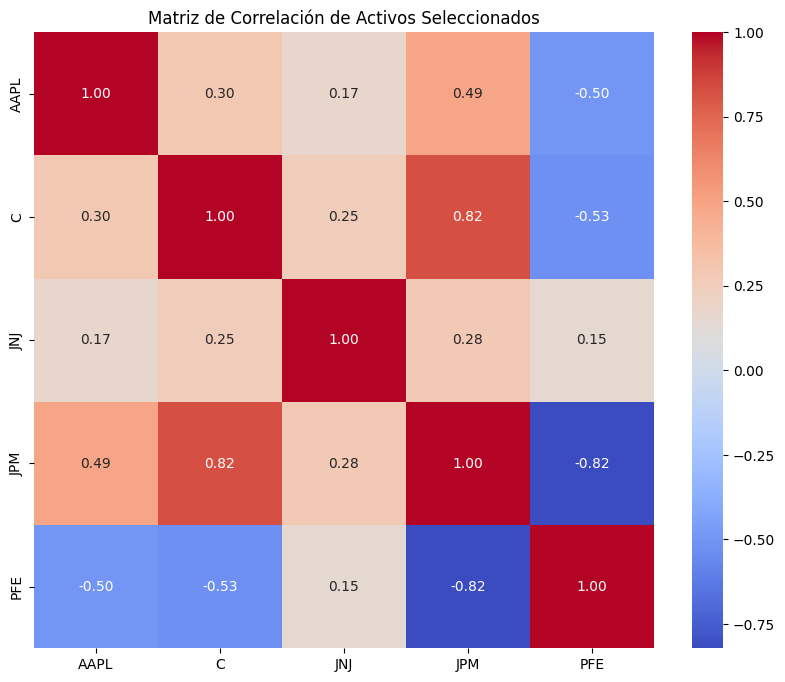

In [8]:
# Seleccionar las variables con correlación cercana a cero
low_corr_vars = correlacion[(correlacion > -0.1) & (correlacion < 0.1)].sum().sort_values().index[:5]

# Obtener el subconjunto de variables no correlacionadas
df_sincorrelacion = df_inicial[low_corr_vars]

# Mostrar las variables seleccionadas
print(df_sincorrelacion.head())

# Visualizar la nueva matriz de correlación de las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.heatmap(df_sincorrelacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos Seleccionados')
plt.show()


Calculo de la volatilidad simple

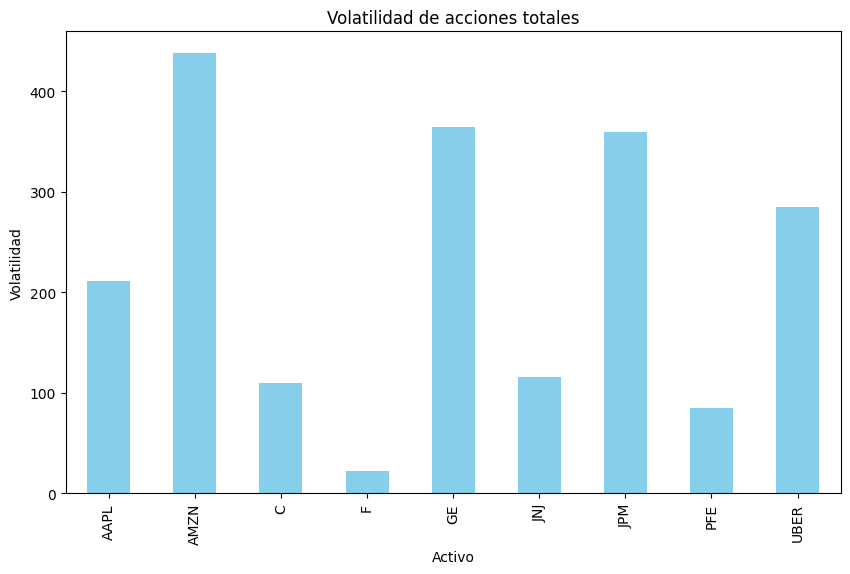

In [9]:
# Calcular la volatilidad (desviación estándar) de cada activo
volatilidad = df_inicial.std()*21
volatilidad
# Crear un gráfico de barras para la volatilidad de cada activo
plt.figure(figsize=(10, 6))
volatilidad.plot(kind='bar', color='skyblue')
plt.title('Volatilidad de acciones totales')
plt.xlabel('Activo')
plt.ylabel('Volatilidad')
plt.xticks(rotation=90)
plt.show()

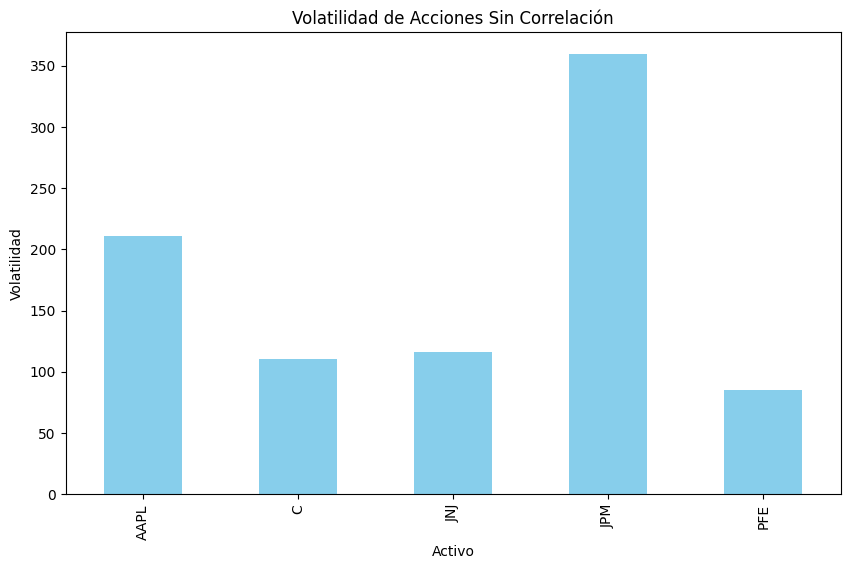

In [10]:
# Calcular la volatilidad (desviación estándar) de cada activo
volatilidad = df_sincorrelacion.std()*21
volatilidad
# Crear un gráfico de barras para la volatilidad de cada activo
plt.figure(figsize=(10, 6))
volatilidad.plot(kind='bar', color='skyblue')
plt.title('Volatilidad de Acciones Sin Correlación')
plt.xlabel('Activo')
plt.ylabel('Volatilidad')
plt.xticks(rotation=90)
plt.show()

Análisis de volatilidad y rendimiento desde formulacion en python

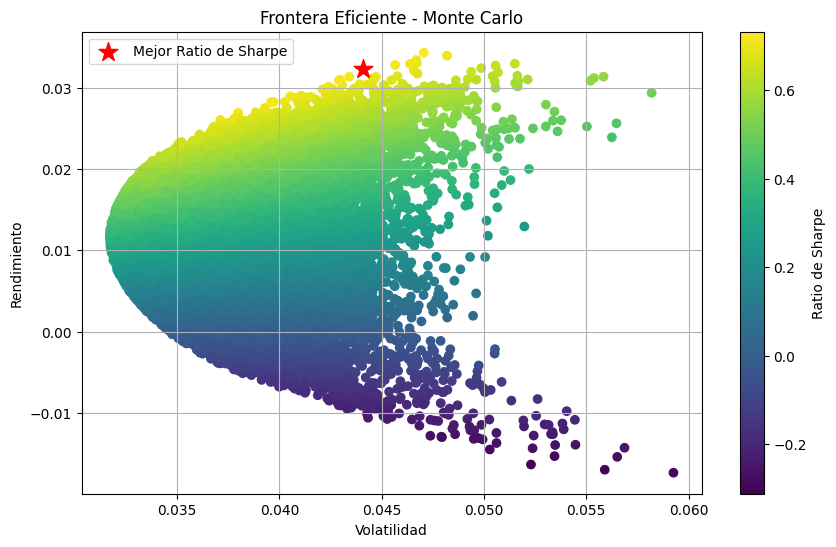

In [11]:
# Calcular los rendimientos mensuales
returns = df_sincorrelacion.dropna().pct_change()

# Calcular la matriz de covarianza
cov_matrix = returns.cov()

# Número de simulaciones de Monte Carlo
num_portfolios = 50000

# Almacenar los resultados de rendimiento y volatilidad
results = np.zeros((3, num_portfolios))

# Simular múltiples portafolios
for i in range(num_portfolios):
    # Generar pesos aleatorios
    weights = np.random.random(len(df_sincorrelacion.columns))
    weights /= np.sum(weights)  # Normalizar para que la suma sea 1

    # Calcular rendimiento y volatilidad
    portfolio_return = np.sum(returns.mean() * weights) * 21
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(21)

    # Almacenar rendimiento, volatilidad y pesos
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Ratio de Sharpe

# Encontrar el portafolio con el mejor ratio de Sharpe
max_sharpe_index = np.argmax(results[2])
best_return = results[0, max_sharpe_index]
best_volatility = results[1, max_sharpe_index]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(best_volatility, best_return, marker='*', color='r', s=200, label='Mejor Ratio de Sharpe')
plt.title('Frontera Eficiente - Monte Carlo')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# calcular el rendimiento y volatilidad del portafolio óptimo
Radio_de_sharpe = best_return/best_volatility
print(f"Rendimiento óptimo: {best_return * 100:.2f}%")
print(f"Volatilidad óptima: {best_volatility * 100:.2f}%")
print(f"Rendimiento de Sharpe: {Radio_de_sharpe}")

Rendimiento óptimo: 3.23%
Volatilidad óptima: 4.41%
Rendimiento de Sharpe: 0.7323573662881544


In [13]:
# Mostrar los pesos óptimos del portafolio con el mejor ratio de Sharpe
best_weights = np.round(np.array([weights]), 4)
print("Pesos óptimos del portafolio con el mejor ratio de Sharpe:")
for i in range(len(df_sincorrelacion.columns)):
    print(df_sincorrelacion.columns[i], ":", best_weights[0, i])


Pesos óptimos del portafolio con el mejor ratio de Sharpe:
AAPL : 0.1079
C : 0.1378
JNJ : 0.1625
JPM : 0.5307
PFE : 0.0612
